In [2]:
from fastcore.basics import Path, AttrDict

config = AttrDict(
    challenge_data_raw_dir = Path('../../data/1_dataset_raw/'),
    challenge_data_clean_dir = Path('../../data/2_dataset_clean/'),
    challenge_data_processed_dir = Path('../../data/3_dataset_processed/'),
    challenge_data_features_dir = Path('../../data/4_dataset_features/'),
    df_merged_small = Path('../../data/2_dataset_clean/df_merged_small.csv'),
    df_merged_medium = Path('../../data/2_dataset_clean/df_merged_medium.csv'),
    df_merged_large = Path('../../data/2_dataset_clean/df_merged_large.csv'),
    df_merged_full = Path('../../data/2_dataset_clean/df_merged_full.csv'),
    valid_ratio = 0.1,
    lag_steps = 5,
    tolerance= 6, # Default evaluation tolerance
)

# read df_merged_small
import pandas as pd
df_merged_small = pd.read_csv(config.df_merged_small)

df_merged_small

,Timestamp,Eccentricity,Semimajor Axis (m),Inclination (deg),RAAN (deg),Argument of Periapsis (deg),True Anomaly (deg),Latitude (deg),Longitude (deg),Altitude (m),X (m),Y (m),Z (m),Vx (m/s),Vy (m/s),Vz (m/s),ObjectID,TimeIndex,EW,NS
0,2022-09-01 00:00:00.000000Z,0.000127,4.216594e+07,0.118065,89.710324,202.940616,216.180960,-0.004704,168.980008,3.579214e+07,-3.608303e+07,2.182526e+07,74580.151140,-1590.894015,-2630.634553,3.250794,545,0,SS-NK,SS-NK
1,2022-09-01 02:00:00.000000Z,0.005056,4.238466e+07,0.118038,89.650304,60.229587,29.090881,-0.006828,169.036746,3.581902e+07,-4.219026e+07,7.579635e+05,86926.450274,-62.865297,-3079.607106,0.090788,545,1,SS-NK,SS-NK
2,2022-09-01 04:00:00.000000Z,0.005062,4.238501e+07,0.118114,89.518050,60.424355,59.091844,-0.007215,169.018089,3.589587e+07,-3.696135e+07,-2.051694e+07,75836.682875,1480.580493,-2694.723791,-3.098809,545,2,SS-NK,SS-NK
3,2022-09-01 06:00:00.000000Z,0.005054,4.238422e+07,0.118364,89.395612,60.350090,89.219001,-0.005842,168.866409,3.600208e+07,-2.184975e+07,-3.631348e+07,44344.181267,2619.892981,-1594.478385,-5.446713,545,3,SS-NK,SS-NK
4,2022-09-01 08:00:00.000000Z,0.005044,4.238313e+07,0.118658,89.353924,60.060612,119.326647,-0.003103,168.560755,3.610888e+07,-9.333845e+05,-4.247677e+07,940.970165,3058.128946,-80.689078,-6.334788,545,4,SS-NK,SS-NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086955,2023-02-28 14:00:00.000000Z,0.000097,4.216560e+07,0.202295,76.581292,105.475645,54.784362,-0.003213,-130.995683,3.578511e+07,-2.306152e+07,-3.529735e+07,50279.886539,2573.928194,-1681.980257,-10.217899,724,2167,IK-EK,IK-EK
1086956,2023-02-28 16:00:00.000000Z,0.000086,4.216585e+07,0.202724,76.572324,112.477268,77.874419,-0.045222,-130.995132,3.578695e+07,-2.262640e+06,-4.210432e+07,-26807.586644,3070.192414,-165.240527,-10.701817,724,2168,IK-EK,IK-EK
1086957,2023-02-28 18:00:00.000000Z,0.000074,4.216590e+07,0.201503,76.418511,113.179844,107.405821,-0.074780,-130.997097,3.578869e+07,1.914591e+07,-3.756949e+07,-96478.786471,2739.408169,1395.816744,-8.212063,724,2169,IK-EK,IK-EK
1086958,2023-02-28 20:00:00.000000Z,0.000068,4.216563e+07,0.201734,76.512042,102.841679,147.728412,-0.083991,-131.001247,3.578992e+07,3.539775e+07,-2.291559e+07,-140014.872786,1670.844246,2580.772766,-3.601286,724,2170,IK-EK,IK-EK


In [3]:
list_object_id = list(df_merged_small['ObjectID'].unique())

In [11]:
def get_df_merged_query(df_merged, list_object_id, position):
    # Retrieve the ObjectID from the list based on the given position
    object_id = list_object_id[position]
    
    # Query df_merged where ObjectID matches the retrieved object_id
    # Note: @object_id inside the query string is used to reference the variable object_id
    return df_merged.query('ObjectID == @object_id')

df_merged_query = get_df_merged_query(df_merged_small, list_object_id, 10)


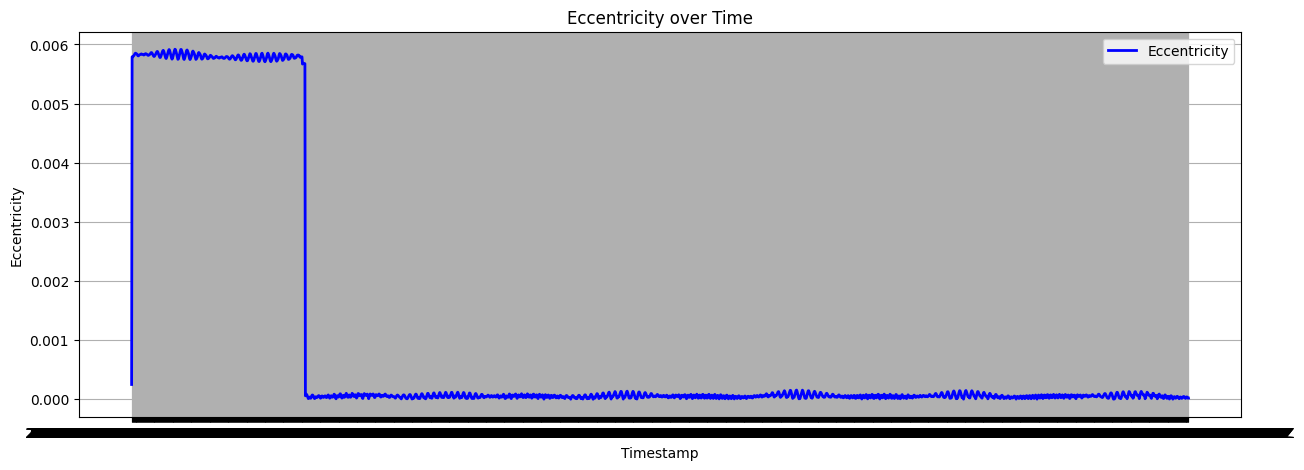

In [12]:
def plot_eccentricity(df_merged_query):
    import matplotlib.pyplot as plt

    # Plot the eccentricity using Matplotlib
    plt.figure(figsize=(15, 5))
    
    # Use the plot function for a line plot, directly from the DataFrame
    plt.plot(df_merged_query['Timestamp'], df_merged_query['Eccentricity'], marker='', color='blue', linewidth=2, label='Eccentricity')
    
    plt.title('Eccentricity over Time')
    plt.xlabel('Timestamp')  # Assuming 'Timestamp' is your x-axis label
    plt.ylabel('Eccentricity')  # And 'Eccentricity' is your y-axis label
    plt.grid(True)
    plt.legend()
    plt.show()

# Assuming df_merged_query is your DataFrame
plot_eccentricity(df_merged_query)
